In [1]:
from TextMiningProcesses import column_lemmatizer, column_stemmatizer, count_vectorize_data, tfidf_vectorize_data

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, GridSearchCV
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
df = pd.read_csv('full_w2v_df-001.csv', index_col=0)

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602453 entries, 0 to 52452
Columns: 301 entries, 0 to overall
dtypes: float64(300), int64(1)
memory usage: 1.4 GB


,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,overall
0,-0.318359,0.024963,0.176758,0.101501,-0.820892,-0.135696,0.225830,-0.821472,1.262939,0.900177,...,-0.723877,-1.481628,0.516296,-0.310629,-0.918121,0.349976,-0.483765,0.867493,1.792969,4
1,0.339233,0.190918,0.002930,0.466248,0.207031,-0.756538,0.021545,-0.252197,1.321289,0.608032,...,-0.002991,-1.336182,0.439636,-0.260376,-0.344482,-0.257324,-1.484467,-0.675476,0.143860,5
2,-0.083984,0.211182,-0.395508,-0.123047,0.075684,-0.642578,-0.117188,-0.563477,0.718750,0.142822,...,-0.194580,-0.677734,0.284668,-0.110474,-0.082397,-0.073242,-0.542969,0.097656,0.243164,5
3,0.082031,0.706055,-0.333801,0.716797,0.046631,-0.020020,0.170654,0.016113,0.623535,1.138672,...,0.087402,-1.345703,0.159912,0.184570,-0.548828,0.953125,0.926270,0.387329,0.845215,5
4,0.562004,2.063141,0.641327,2.409454,-2.299713,-0.079361,2.213966,-2.263481,0.141418,6.318817,...,0.066101,-1.266113,0.831573,-0.717789,-3.124107,1.606995,-1.510742,-1.568970,1.363419,1


5    416033
4     75439
1     59610
3     30642
2     20729
Name: overall, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602453 entries, 0 to 52452
Columns: 300 entries, 0 to 299
dtypes: float64(300)
memory usage: 1.4 GB


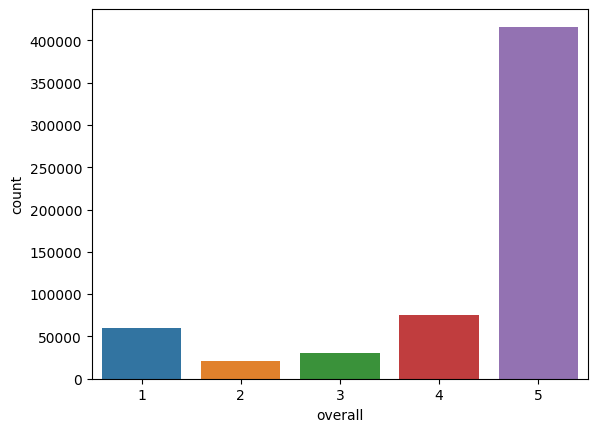

In [3]:
display(df['overall'].value_counts())

warnings.filterwarnings("ignore")

sns.countplot(x='overall', data=df)

warnings.filterwarnings("default")

features = df.drop(columns='overall')
target = df['overall']

features.info()
# target.info()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=69)

print("Train data before oversampling:")
print(y_train.value_counts())

sampler = RandomOverSampler(sampling_strategy='auto')
X_train, y_train = sampler.fit_resample(X_train, y_train)


print("\nTrain data after oversampling:")
print(y_train.value_counts())

# Scale the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print the shapes of the resulting data
print("\nShapes of the datasets:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Train data before oversampling:
5    312031
4     56727
1     44538
3     23007
2     15536
Name: overall, dtype: int64

Train data after oversampling:
4    312031
5    312031
2    312031
1    312031
3    312031
Name: overall, dtype: int64

Shapes of the datasets:
X_train shape: (1560155, 300)
y_train shape: (1560155,)
X_test shape: (150614, 300)
y_test shape: (150614,)


# 1. Logistic Regression


In [6]:
logistic_model = LogisticRegression(max_iter=5000)
logistic_model.fit(X_train, y_train)
y_pred_train_logistic = logistic_model.predict(X_train)
y_pred_test_logistic = logistic_model.predict(X_test)
# logistic_report_lem_cv = classification_report(y_test, y_pred_logistic_lem_cv)
logistic_report_train_imbalanced = classification_report_imbalanced(y_train, y_pred_train_logistic)
logistic_report_test_imbalanced = classification_report_imbalanced(y_test, y_pred_test_logistic)
# confusion_matrix_logistic_lem_cv = confusion_matrix(y_test, y_pred_logistic_lem_cv)
accuracy_train_logistic = accuracy_score(y_train, y_pred_train_logistic)
accuracy_test_logistic = accuracy_score(y_test, y_pred_test_logistic)
# print("Logistic Regression Classification Report (lem_cv):", logistic_report_lem_cv)
print("Logistic Regression - Classification Report: Train Data (lem_cv) - imbalanced:\n", logistic_report_train_imbalanced)
print("\nLogistic Regression - Classification Report: Test Data (lem_cv) - imbalanced:\n", logistic_report_test_imbalanced)
# print("\nConfusion Matrix (lem_cv):")
# display(confusion_matrix_logistic_lem_cv)
print("\nAccuracy Score: Train Data (lem_cv):", accuracy_train_logistic)
print("Accuracy Score: Test Data (lem_cv):", accuracy_test_logistic)



Logistic Regression - Classification Report: Train Data (lem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.33      0.34      0.83      0.33      0.53      0.26    312031
          2       0.30      0.18      0.89      0.23      0.40      0.15    312031
          3       0.29      0.18      0.89      0.22      0.40      0.15    312031
          4       0.25      0.15      0.89      0.19      0.37      0.12    312031
          5       0.31      0.67      0.63      0.42      0.65      0.42    312031

avg / total       0.30      0.30      0.83      0.28      0.47      0.22   1560155


Logistic Regression - Classification Report: Test Data (lem_cv) - imbalanced:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.23      0.33      0.88      0.27      0.54      0.27     15072
          2       0.07      0.16      0.92      0.09      0.38      0.14      5193
      

## Summary - Logistic Regression

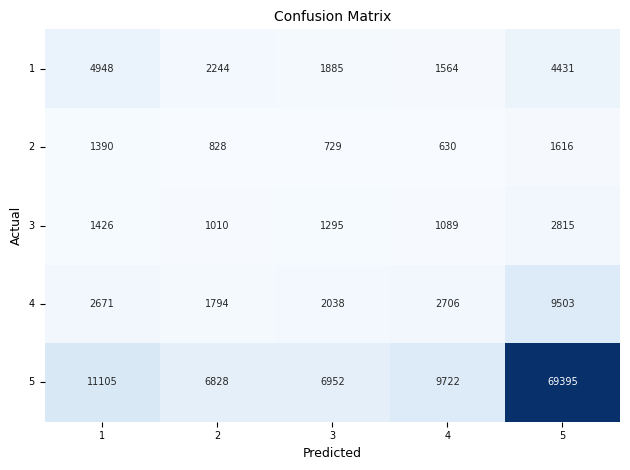

Logistic Regression results:
Accuracy: 0.5256616250813337
Precision: 0.5977413592210228
Recall: 0.5256616250813337
F1 Score 0.5559375186026871
R Squared: -0.7602274981140316
MSE: 3.0038376246564065


In [8]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_test_logistic)
    
    # Plotting Confusion Matrix as sns.heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"size": 7},
            xticklabels=['1', '2', '3', '4', '5'],
            yticklabels=['1', '2', '3', '4', '5'])
plt.xticks(fontsize=7)
plt.yticks(fontsize=7, rotation=0)
plt.title(f'Confusion Matrix', fontsize=10)
plt.xlabel('Predicted', fontsize=9)
plt.ylabel('Actual', fontsize=9)

plt.tight_layout()
plt.show()

orig_acc = accuracy_score(y_test, y_pred_test_logistic)
orig_pre = precision_score(y_test, y_pred_test_logistic, average='weighted')
orig_rec = recall_score(y_test, y_pred_test_logistic, average='weighted')
orig_f1 = f1_score(y_test, y_pred_test_logistic, average='weighted')
orig_r2 = r2_score(y_test, y_pred_test_logistic)
orig_mse = mean_squared_error(y_test, y_pred_test_logistic)

print(f'Logistic Regression results:')
print(f'Accuracy: {orig_acc}\nPrecision: {orig_pre}\nRecall: {orig_rec}\nF1 Score {orig_f1}\nR Squared: {orig_r2}\nMSE: {orig_mse}')

## GridSearch

In [ ]:
# Define the parameter grid for GridSearch
param_grid = {
    'C': [, 0.01, 1, 100,],
    'penalty': ['l1', 'l2', 'elasticnet'],
}

# Create Logistic Regression model
logistic_model = LogisticRegression(solver='saga', max_iter=5000)

# Create GridSearchCV object
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')

# Fit the model with Lemmatized CountVectorized data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_logistic_model = grid_search.best_estimator_

# Use the best model to make predictions
y_pred_train_logistic = best_logistic_model.predict(X_train)
y_pred_test_logistic = best_logistic_model.predict(X_test)

# Evaluate the model
logistic_report_train = classification_report_imbalanced(y_train, y_pred_train_logistic)
logistic_report_test = classification_report_imbalanced(y_test, y_pred_test_logistic)

accuracy_train_logistic = accuracy_score(y_train, y_pred_train_logistic)
accuracy_test_logistic = accuracy_score(y_test, y_pred_test_logistic)

# Print results
print("Best Parameters:", best_params)
print("Logistic Regression - Classification Report: Train Data (lem_cv) - imbalanced:\n", logistic_report_train)
print("\nLogistic Regression - Classification Report: Test Data (lem_cv) - imbalanced:\n", logistic_report_test)
print("\nAccuracy Score: Train Data (lem_cv):", accuracy_train_logistic)
print("Accuracy Score: Test Data (lem_cv):", accuracy_test_logistic)

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_test_logistic)
    
    # Plotting Confusion Matrix as sns.heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"size": 7},
            xticklabels=['1', '2', '3', '4', '5'],
            yticklabels=['1', '2', '3', '4', '5'])
plt.xticks(fontsize=7)
plt.yticks(fontsize=7, rotation=0)
plt.title(f'Confusion Matrix', fontsize=10)
plt.xlabel('Predicted', fontsize=9)
plt.ylabel('Actual', fontsize=9)

plt.tight_layout()
plt.show()

orig_acc = accuracy_score(y_test, y_pred_test_logistic)
orig_pre = precision_score(y_test, y_pred_test_logistic, average='weighted')
orig_rec = recall_score(y_test, y_pred_test_logistic, average='weighted')
orig_f1 = f1_score(y_test, y_pred_test_logistic, average='weighted')
orig_r2 = r2_score(y_test, y_pred_test_logistic)
orig_mse = mean_squared_error(y_test, y_pred_test_logistic)

print(f'Final Logistic Regression results:')
print(f'Accuracy: {orig_acc}\nPrecision: {orig_pre}\nRecall: {orig_rec}\nF1 Score {orig_f1}\nR Squared: {orig_r2}\nMSE: {orig_mse}')

# 5. Random Forest Classifier

In [9]:
# Random Forest model
rf_model = RandomForestClassifier(n_jobs=-1)  # You can customize parameters here if needed
rf_model.fit(X_train, y_train)
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

# Random Forest classification reports and accuracy scores
rf_report_train_imbalanced = classification_report_imbalanced(y_train, y_pred_train_rf)
rf_report_test_imbalanced = classification_report_imbalanced(y_test, y_pred_test_rf)
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

# Print results
print("Random Forest - Classification Report: Train Data (lem_cv):\n", rf_report_train_imbalanced)
print("\nRandom Forest - Classification Report: Test Data (lem_cv):\n", rf_report_test_imbalanced)
print("\nAccuracy Score: Train Data (lem_cv):", accuracy_train_rf)
print("Accuracy Score: Test Data (lem_cv):", accuracy_test_rf)

Random Forest - Classification Report: Train Data (lem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.98      0.95      0.99      0.96      0.97      0.94    312031
          2       0.97      0.96      0.99      0.97      0.98      0.95    312031
          3       0.97      0.92      0.99      0.95      0.96      0.91    312031
          4       0.91      0.87      0.98      0.89      0.92      0.84    312031
          5       0.82      0.93      0.95      0.87      0.94      0.88    312031

avg / total       0.93      0.93      0.98      0.93      0.95      0.90   1560155


Random Forest - Classification Report: Test Data (lem_cv):
                    pre       rec       spe        f1       geo       iba       sup

          1       0.31      0.05      0.99      0.08      0.22      0.04     15072
          2       0.09      0.02      0.99      0.03      0.13      0.02      5193
          3       0.17      0.03      0.99  

## Summary - Random Forest

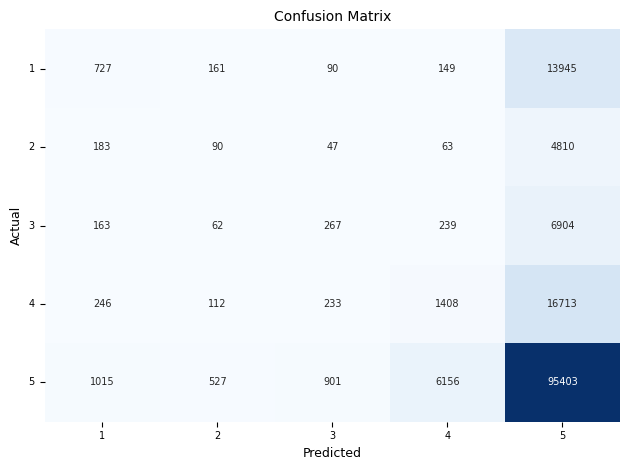

Random Forest results:
Accuracy: 0.6499727780949978
Precision: 0.5432092159192943
Recall: 0.6499727780949978
F1 Score 0.5703561400645156
R Squared: -0.3526929295329513
MSE: 2.30837770725165


In [10]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_test_rf)
    
    # Plotting Confusion Matrix as sns.heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"size": 7},
            xticklabels=['1', '2', '3', '4', '5'],
            yticklabels=['1', '2', '3', '4', '5'])
plt.xticks(fontsize=7)
plt.yticks(fontsize=7, rotation=0)
plt.title(f'Confusion Matrix', fontsize=10)
plt.xlabel('Predicted', fontsize=9)
plt.ylabel('Actual', fontsize=9)

plt.tight_layout()
plt.show()

orig_acc = accuracy_score(y_test, y_pred_test_rf)
orig_pre = precision_score(y_test, y_pred_test_rf, average='weighted')
orig_rec = recall_score(y_test, y_pred_test_rf, average='weighted')
orig_f1 = f1_score(y_test, y_pred_test_rf, average='weighted')
orig_r2 = r2_score(y_test, y_pred_test_rf)
orig_mse = mean_squared_error(y_test, y_pred_test_rf)

print(f'Random Forest results:')
print(f'Accuracy: {orig_acc}\nPrecision: {orig_pre}\nRecall: {orig_rec}\nF1 Score {orig_f1}\nR Squared: {orig_r2}\nMSE: {orig_mse}')

## GridSearch

In [13]:
# Define the parameter grid for GridSearch
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create Random Forest model
rf_model = RandomForestClassifier(n_jobs=-1)

# Create GridSearchCV object
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')

# Fit the model with Lemmatized CountVectorized data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best estimator from the grid search
best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_

# Use the best model to make predictions
y_pred_train_rf = best_rf_model.predict(X_train)
y_pred_test_rf = best_rf_model.predict(X_test)

# Evaluate the model
rf_report_train_imbalanced = classification_report_imbalanced(y_train, y_pred_train_rf)
rf_report_test_imbalanced = classification_report_imbalanced(y_test, y_pred_test_rf)

accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

# Print results
print("Best Parameters for Random Forest:", best_params_rf)
print("Random Forest - Classification Report: Train Data (lem_cv):\n", rf_report_train_imbalanced)
print("\nRandom Forest - Classification Report: Test Data (lem_cv):\n", rf_report_test_imbalanced)
print("\nAccuracy Score: Train Data (lem_cv):", accuracy_train_rf)
print("Accuracy Score: Test Data (lem_cv):", accuracy_test_rf)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


KeyboardInterrupt: 

In [18]:
from tqdm import tqdm

# Define the parameter grid for GridSearch
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create Random Forest model
rf_model = RandomForestClassifier(n_jobs=-1)

# Create GridSearchCV object with tqdm and verbose
with tqdm(total=len(param_grid_rf['n_estimators']) * len(param_grid_rf['max_depth']) * 
          len(param_grid_rf['min_samples_split']) * len(param_grid_rf['min_samples_leaf'])) as pbar:
    grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, scoring='accuracy', verbose=2)

    # Fit the model with Lemmatized CountVectorized data
    grid_search_rf.fit(X_train, y_train)

    # Update the progress bar
    pbar.update(1)

# Get the best parameters and best estimator from the grid search
best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_

# Use the best model to make predictions
y_pred_train_rf = best_rf_model.predict(X_train)
y_pred_test_rf = best_rf_model.predict(X_test)

# Evaluate the model
rf_report_train = classification_report(y_train, y_pred_train_rf)
rf_report_test = classification_report(y_test, y_pred_test_rf)

accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

# Print results
print("Best Parameters for Random Forest:", best_params_rf)
print("Random Forest - Classification Report: Train Data (lem_cv):\n", rf_report_train)
print("\nRandom Forest - Classification Report: Test Data (lem_cv):\n", rf_report_test)
print("\nAccuracy Score: Train Data (lem_cv):", accuracy_train_rf)
print("Accuracy Score: Test Data (lem_cv):", accuracy_test_rf)

  0%|          | 0/24 [00:00<?, ?it/s]

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 4.9min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 4.1min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 4.1min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 7.7min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 7.6min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 7.5min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=14.9min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=14.9min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=16.3min
[CV] END max_de

  4%|▍         | 1/24 [9:16:55<213:29:21, 33415.70s/it]


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest - Classification Report: Train Data (lem_cv):
               precision    recall  f1-score   support

           1       0.98      0.95      0.96    312031
           2       0.97      0.96      0.97    312031
           3       0.97      0.92      0.95    312031
           4       0.91      0.87      0.89    312031
           5       0.82      0.93      0.87    312031

    accuracy                           0.93   1560155
   macro avg       0.93      0.93      0.93   1560155
weighted avg       0.93      0.93      0.93   1560155


Random Forest - Classification Report: Test Data (lem_cv):
               precision    recall  f1-score   support

           1       0.35      0.04      0.07     15072
           2       0.10      0.02      0.03      5193
           3       0.17      0.03      0.06      7635
           4       0.18      0.07      0.11     1

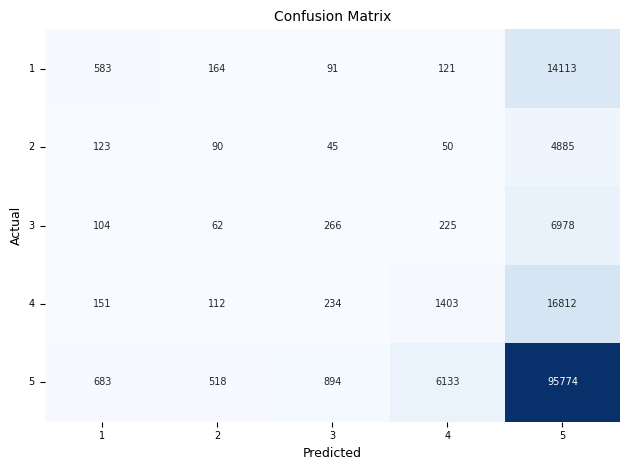

Final Random Forest results:
Accuracy: 0.6514401051695061
Precision: 0.5468429769967472
Recall: 0.6514401051695061
F1 Score 0.5693079430655067
R Squared: -0.3404411360853561
MSE: 2.287469956312162


In [19]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_test_rf)
    
    # Plotting Confusion Matrix as sns.heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"size": 7},
            xticklabels=['1', '2', '3', '4', '5'],
            yticklabels=['1', '2', '3', '4', '5'])
plt.xticks(fontsize=7)
plt.yticks(fontsize=7, rotation=0)
plt.title(f'Confusion Matrix', fontsize=10)
plt.xlabel('Predicted', fontsize=9)
plt.ylabel('Actual', fontsize=9)

plt.tight_layout()
plt.show()

orig_acc = accuracy_score(y_test, y_pred_test_rf)
orig_pre = precision_score(y_test, y_pred_test_rf, average='weighted')
orig_rec = recall_score(y_test, y_pred_test_rf, average='weighted')
orig_f1 = f1_score(y_test, y_pred_test_rf, average='weighted')
orig_r2 = r2_score(y_test, y_pred_test_rf)
orig_mse = mean_squared_error(y_test, y_pred_test_rf)

print(f'Final Random Forest results:')
print(f'Accuracy: {orig_acc}\nPrecision: {orig_pre}\nRecall: {orig_rec}\nF1 Score {orig_f1}\nR Squared: {orig_r2}\nMSE: {orig_mse}')

In [20]:
# Define the parameter grid for GridSearch
param_grid_rf = {
    'n_estimators': [200],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'criterion': ['entropy', 'log_loss']
}

# Create Random Forest model
rf_model = RandomForestClassifier(n_jobs=-1)

# Create GridSearchCV object with verbose
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, scoring='accuracy', verbose=2)

# Fit the model with Lemmatized CountVectorized data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best estimator from the grid search
best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_

# Use the best model to make predictions
y_pred_train_rf = best_rf_model.predict(X_train)
y_pred_test_rf = best_rf_model.predict(X_test)

# Evaluate the model
rf_report_train = classification_report(y_train, y_pred_train_rf)
rf_report_test_imbalanced = classification_report_imbalanced(y_test, y_pred_test_rf)

accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

# Print results
print("Best Parameters for Random Forest:", best_params_rf)
print("Random Forest - Classification Report: Train Data:\n", rf_report_train)
print("\nRandom Forest - Classification Report: Test Data:\n", rf_report_test_imbalanced)
print("\nAccuracy Score: Train Data:", accuracy_train_rf)
print("Accuracy Score: Test Data:", accuracy_test_rf)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=16.5min
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=16.5min
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=16.4min
[CV] END criterion=log_loss, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.3s
[CV] END criterion=log_loss, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.4s
[CV] END criterion=log_loss, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  10.9s


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 273, in _wrap_func_call
    return func()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/joblib/parallel.py", line 590, in __call__
    for func, args, kwargs in self.items]
  File "/Library/Frameworks/Python.framework/Versio

Best Parameters for Random Forest: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest - Classification Report: Train Data:
               precision    recall  f1-score   support

           1       0.98      0.95      0.96    312031
           2       0.97      0.96      0.97    312031
           3       0.97      0.92      0.95    312031
           4       0.91      0.87      0.89    312031
           5       0.82      0.92      0.87    312031

    accuracy                           0.93   1560155
   macro avg       0.93      0.93      0.93   1560155
weighted avg       0.93      0.93      0.93   1560155


Random Forest - Classification Report: Test Data:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.35      0.04      0.99      0.07      0.20      0.04     15072
          2       0.09      0.02      0.99      0.03      0.13      0.02      5193
          

In [22]:
# Define the parameter grid for GridSearch
param_grid_rf = {
    'n_estimators': [200],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'bootstrap': [False]
}

# Create Random Forest model
rf_model = RandomForestClassifier(n_jobs=-1, n_estimators=200, max_depth=None, min_samples_leaf=1, min_samples_split=2, bootstrap=False)

# Create GridSearchCV object with verbose
# grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, scoring='accuracy', verbose=2)

# Fit the model with Lemmatized CountVectorized data
rf_model.fit(X_train, y_train)

# Get the best parameters and best estimator from the grid search
# best_params_rf = grid_search_rf.best_params_
# best_rf_model = grid_search_rf.best_estimator_

# Use the best model to make predictions
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

# Evaluate the model
rf_report_train = classification_report(y_train, y_pred_train_rf)
rf_report_test_imbalanced = classification_report_imbalanced(y_test, y_pred_test_rf)

accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

# Print results
print("Best Parameters for Random Forest:", best_params_rf)
print("Random Forest - Classification Report: Train Data:\n", rf_report_train)
print("\nRandom Forest - Classification Report: Test Data:\n", rf_report_test_imbalanced)
print("\nAccuracy Score: Train Data:", accuracy_train_rf)
print("Accuracy Score: Test Data:", accuracy_test_rf)

Best Parameters for Random Forest: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest - Classification Report: Train Data:
               precision    recall  f1-score   support

           1       0.98      0.95      0.96    312031
           2       0.97      0.96      0.97    312031
           3       0.97      0.92      0.95    312031
           4       0.91      0.87      0.89    312031
           5       0.82      0.92      0.87    312031

    accuracy                           0.93   1560155
   macro avg       0.93      0.93      0.93   1560155
weighted avg       0.93      0.93      0.93   1560155


Random Forest - Classification Report: Test Data:
                    pre       rec       spe        f1       geo       iba       sup

          1       0.35      0.03      0.99      0.06      0.18      0.03     15072
          2       0.09      0.02      0.99      0.03      0.13      0.02      5193
          

In [23]:
# Import shap library
import shap

# Train your RandomForestClassifier (already in your code)

# Create a SHAP explainer for your trained model
explainer = shap.TreeExplainer(rf_model)

# Compute SHAP values for a subset of your data (e.g., X_train)
shap_values = explainer.shap_values(X_train)

# Visualize feature importance using a summary plot
shap.summary_plot(shap_values, X_train, plot_type='bar')

# Create a summary plot for individual predictions (e.g., for the first instance in X_train)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_train.iloc[0, :])

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


# ---------